In [83]:
# Importing the libraries to be used:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE


In [84]:
df = pd.read_csv('data.csv')
df1 = df.to_numpy()

X = df1[:,:-1]
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)
Y = df1[:,-1:].reshape(X.shape[0],)

In [85]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [86]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_smote, Y_smote = smote.fit_resample(X_train,Y_train)
X_train, Y_train = X_smote, Y_smote

In [87]:
def k_means():
    kmeans = KMeans(n_clusters=2).fit(X_train)

    Yhat_svc_kmeans_train = kmeans.predict(X_train)
    acc_train = 1-np.count_nonzero(Yhat_svc_kmeans_train-Y_train)/X_train.shape[0]
    
    acc_train_kmeans.append(acc_train)
    
    Yhat_svc_kmeans_test = kmeans.predict(X_test)
    acc_test = 1-np.count_nonzero(Yhat_svc_kmeans_test-Y_test)/X_test.shape[0]

    acc_test_kmeans.append(acc_test)

In [88]:
acc_train_kmeans = []
acc_test_kmeans = []
for i in range(100):
    k_means()

In [89]:
max(acc_test_kmeans)

0.7878682842287695

In [90]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2).fit_transform(X)

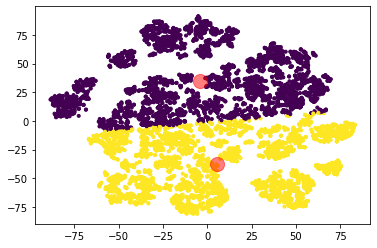

In [95]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_embedded)
y_kmeans = kmeans.predict(X_embedded)
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y_kmeans, marker='.')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, alpha=0.5, color = 'red')